### **1 - DQ_Learning Algorithm :**

In [1]:
import traci
import numpy as np
import tensorflow as tf
import pickle
import time
import matplotlib.pyplot as plt

In [2]:
# --- Constants ---
STATE_DIM = 5  
ACTION_DIM = 2  # Number of possible actions
GAMMA = 0.9  # Discount factor
ALPHA = 0.001  # Learning rate
EPSILON = 0.1  # Exploration factor
MEMORY_CAPACITY = 10000  # Replay memory size
BATCH_SIZE = 32  # Batch size for training
NUM_EPISODES = 100  # Number of training episodes

# --- Q-Network ---
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(STATE_DIM,)),  # Match input size
    tf.keras.layers.Dense(ACTION_DIM, activation='linear')  # Match action size
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=ALPHA), loss='mse')

# --- Replay Memory ---
memory = []

c:\Users\s_bou\Downloads\Aya_RL\AyaaCode\RL_Project\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# --- Helper Functions ---
def get_state():
    """Fetch the current state from the simulator (e.g., SUMO)."""
    state = [
        traci.edge.getLastStepHaltingNumber("E5"),  # Number of halting vehicles in E5
        traci.edge.getLastStepHaltingNumber("E4"),  # Number of halting vehicles in E4
        traci.edge.getLastStepMeanSpeed("E0"),      # Average speed on E0 (highway)
        traci.edge.getWaitingTime("E4"),            # Waiting time in E4
        traci.edge.getWaitingTime("E5"),            # Waiting time in E5
    ]
    return np.array(state)

def choose_action(state):
    """Epsilon-greedy policy to select an action."""
    if np.random.rand() < EPSILON:
        return np.random.randint(ACTION_DIM)
    else:
        state = state.reshape(1, -1)  # Ensure the state has correct dimensions
        q_values = model.predict(state, verbose=0)[0]
        return np.argmax(q_values)

def update_q_network():
    """Update the Q-network using replay memory."""
    if len(memory) < BATCH_SIZE:
        return
    
    # Randomly sample a minibatch from memory
    indices = np.random.choice(len(memory), BATCH_SIZE, replace=False)
    minibatch = [memory[i] for i in indices]
    
    states = np.array([transition[0] for transition in minibatch])
    actions = np.array([transition[1] for transition in minibatch])
    rewards = np.array([transition[2] for transition in minibatch])
    next_states = np.array([transition[3] for transition in minibatch])
    terminals = np.array([transition[4] for transition in minibatch])
    
    q_values = model.predict(states, verbose=0)
    next_q_values = model.predict(next_states, verbose=0)
    
    for i in range(BATCH_SIZE):
        if terminals[i]:
            q_values[i, actions[i]] = rewards[i]
        else:
            q_values[i, actions[i]] = rewards[i] + GAMMA * np.max(next_q_values[i])
    
    model.fit(states, q_values, epochs=1, verbose=0)

# Reward calculation function (from your working example)
def calculate_reward(state):
    """Calculate the reward based on traffic metrics."""
    ramp_waiting_time = state[3] + state[4]  # Total ramp waiting time (E4 + E5)
    highway_flow = state[2]  # Highway flow is the average speed on E0
    max_ramp_waiting = 1000 # Example max ramp waiting time
    max_highway_speed = 50  # Example max highway speed
    print(ramp_waiting_time)
    # Normalize metrics
    normalized_rwt = ramp_waiting_time / max_ramp_waiting
    normalized_hf = highway_flow / max_highway_speed
    
    # Weights
    alpha = 2.0  # Weight for ramp waiting time
    beta = 1.0   # Weight for highway flow
    
    # Basic reward
    reward = -alpha * normalized_rwt + beta * normalized_hf 
    
    # Penalty for extreme congestion (e.g., when ramp waiting time exceeds 80% of max)
    if ramp_waiting_time > max_ramp_waiting * 0.8:
        reward -= 10  # Strong penalty for high congestion
    
    return reward

def check_if_done():
    """Define termination condition."""
    return traci.simulation.getTime() > 1000  # Example: End after 1000 second

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
4.0
6.0
8.0
10.0
12.0
14.0
16.0
18.0
20.0
22.0
24.0
26.0
28.0
30.0
32.0
34.0
36.0
38.0
40.0
42.0
44.0
47.0
26.0
26.0
29.0
32.0
35.0
38.0
41.0
37.0
32.0
33.0
34.0
35.0
36.0
38.0
41.0
44.0
47.0
50.0
53.0
56.0
59.0
62.0
65.0
69.0
73.0
77.0
81.0
85.0
89.0
93.0
97.0
101.0
105.0
109.0
113.0
117.0
121.0
125.0
129.0
133.0
137.0
141.0
145.0
149.0
153.0
157.0
161.0
165.0
169.0
173.0
177.0
182.0
187.0
192.0
197.0
202.0
207.0
212.0
217.0
222.0
227.0
232.0
237.0
242.0
247.0
252.0
257.0
262.0
267.0
272.0
277.0
282.0
287.0
292.0
298.0
304.0
310.0
316.0
322.0
328.0
334.0
340.0
346.0
352.0
358.0
364.0
370.0
376.0
382.0
388.0
394.0
400.0
406.0
412.0
418.0
424.0
430.0
437.0
444.0
451.0
458.0
465.0
472.0
479.0
486.0
493.0
500.0
507.0
514.0
521.0
528.0
400.0
306.0
211.0
123.0
126.0
63.0
2

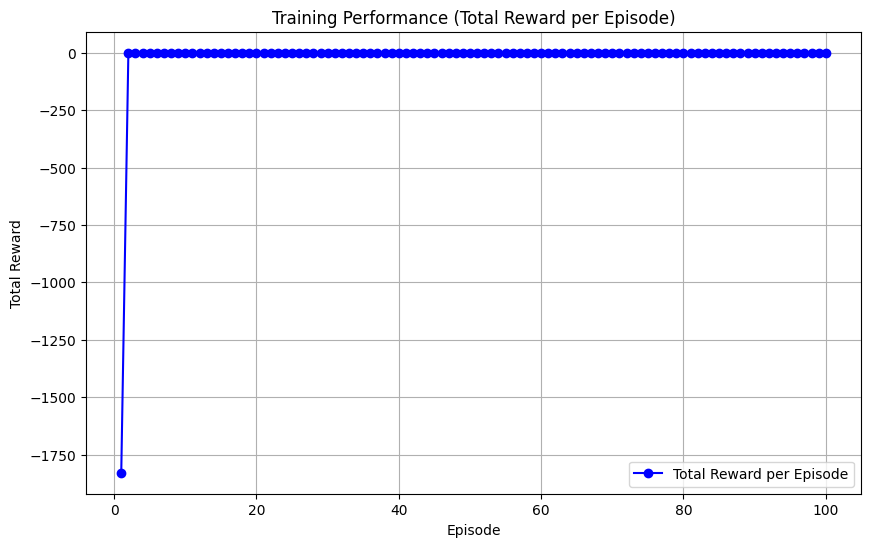

In [6]:
# --- Training Loop ---

traci.start(["sumo", "-c", r"..\sumo_config\simulation.sumocfg"])  # Update with your SUMO config file

episode_rewards = []  # To store rewards per episode

for episode in range(NUM_EPISODES):
    state = get_state()
    total_reward = 0
    
    while traci.simulation.getMinExpectedNumber() > 0:
        action = choose_action(state)
        traci.trafficlight.setPhase("J7", action)  # Apply action (update traffic light phase)
        traci.simulationStep()  # Step simulation
        
        next_state = get_state()
        
        # Calculate reward based on traffic metrics
        reward = calculate_reward(state)
        
        done = check_if_done()
        
        # Store transition in replay memory
        memory.append((state, action, reward, next_state, done))
        if len(memory) > MEMORY_CAPACITY:
            memory.pop(0)
        
        update_q_network()
        state = next_state
        total_reward += reward
        
        if done:
            break
    
    episode_rewards.append(total_reward)  # Store total reward for the episode
    print(f"Episode {episode + 1}/{NUM_EPISODES}, Total Reward: {total_reward}")

# --- Visualization ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, NUM_EPISODES + 1), episode_rewards, label="Total Reward per Episode", color="blue", marker="o")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Performance (Total Reward per Episode)")
plt.legend()
plt.grid(True)
plt.show()

# Close SUMO connection
traci.close()


### **2 - Hyperparmeter-tunning:**

In [7]:
def train(EPSILON=0.1, GAMMA=0.9, ALPHA=0.001, NB_NEURONS = 32 , ACTIVATION = "relu",NUM_EPISODES=100):

    # --- Q-Network ---
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(NB_NEURONS, activation=ACTIVATION, input_shape=(STATE_DIM,)),  # Match input size
        tf.keras.layers.Dense(ACTION_DIM, activation='linear')  # Match action size
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=ALPHA), loss='mse')

    traci.start(["sumo", "-c", r"..\sumo_config\simulation.sumocfg"])  # Update with your SUMO config file

    episode_rewards = []  # To store rewards per episode

    for episode in range(NUM_EPISODES):
        state = get_state()
        total_reward = 0
        
        while traci.simulation.getMinExpectedNumber() > 0:
            action = choose_action(state)
            traci.trafficlight.setPhase("J7", action)  # Apply action (update traffic light phase)
            traci.simulationStep()  # Step simulation
            
            next_state = get_state()
            
            # Calculate reward based on traffic metrics
            reward = calculate_reward(state)
            
            done = check_if_done()
            
            # Store transition in replay memory
            memory.append((state, action, reward, next_state, done))
            if len(memory) > MEMORY_CAPACITY:
                memory.pop(0)
            
            update_q_network()
            state = next_state
            total_reward += reward
            
            if done:
                break
        
        episode_rewards.append(total_reward)  # Store total reward for the episode
        print(f"Episode {episode + 1}/{NUM_EPISODES}, Total Reward: {total_reward}")

    traci.close()

    return episode_rewards, model

In [8]:
EPSILONS = [0, 1, 0.1, 0.01]
ALPHAS = [0.001,0.1, 0.2, 0.5, 0.7]
GAMMAS = [0.7, 0.9, 0.8]
ACTIVATIONS = ['relu', 'tanh', 'sigmoid']
NB_NEURONS = [32,64,128]

results_epsilon = []
results_gammmas = []
results_alphas = []
results_activations = []
results_neurons = []

for EPSILON in  EPSILONS:
    result = train(EPSILON=EPSILON)
    results_epsilon.append([EPSILON, result[0]])
for GAMMA in  GAMMAS:
    result = train(GAMMA=GAMMA)
    results_gammmas.append([GAMMA, result[0]])
for ALPHA in  ALPHAS:
    result = train(ALPHA = ALPHA )
    results_alphas.append([ALPHA, result[0]])
for ACTIVATION in  ACTIVATIONS:
    result = train(ACTIVATION=ACTIVATION)
    results_activations.append([ACTIVATION, result[0]])
for neurons in  NB_NEURONS:
    result = train(NB_NEURONS=neurons)
    results_neurons.append([neurons, result[0]])

c:\Users\s_bou\Downloads\Aya_RL\AyaaCode\RL_Project\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
0.0
1.0
2.0
3.0
4.0
5.0
6.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
2.0
3.0
4.0
5.0
6.0
8.0
10.0
12.0
14.0
16.0
18.0
20.0
22.0
24.0
26.0
28.0
30.0
32.0
34.0
36.0
38.0
40.0
42.0
44.0
46.0
48.0
50.0
52.0
55.0
58.0
61.0
64.0
67.0
70.0
73.0
76.0
79.0
82.0
85.0
88.0
91.0
94.0
97.0
100.0
103.0
106.0
109.0
112.0
115.0
118.0
121.0
124.0
128.0
132.0
136.0
140.0
144.0
148.0
152.0
156.0
160.0
164.0
168.0
172.0
176.0
180.0
184.0
188.0
192.0
196.0
200.0
204.0
208.0
212.0
216.0
220.0
224.0
228.0
232.0
236.0
241.0
246.0
251.0
256.0
261.0
266.0
271.0
276.0
281.0
286.0
291.0
296.0
301.0
306.0
311.0
316.0
321.0
326.0
331.0
336.0
341.0
346.0
352.0
358.0
364.0
370.0
376.0
382.0
388.0
394.0
400.0
406.0
412.0
418.0
424.0
430.0
436.0
442.0
448.0
454.0
460.0
466.0
472.0
478.0
484.0
491.0
498.0
505.0
512.0
519.0
526.0
533.0
540.0
547.0
554.0
561.0
568.0
575.0
582.0
448.0
454.0
460.0
4

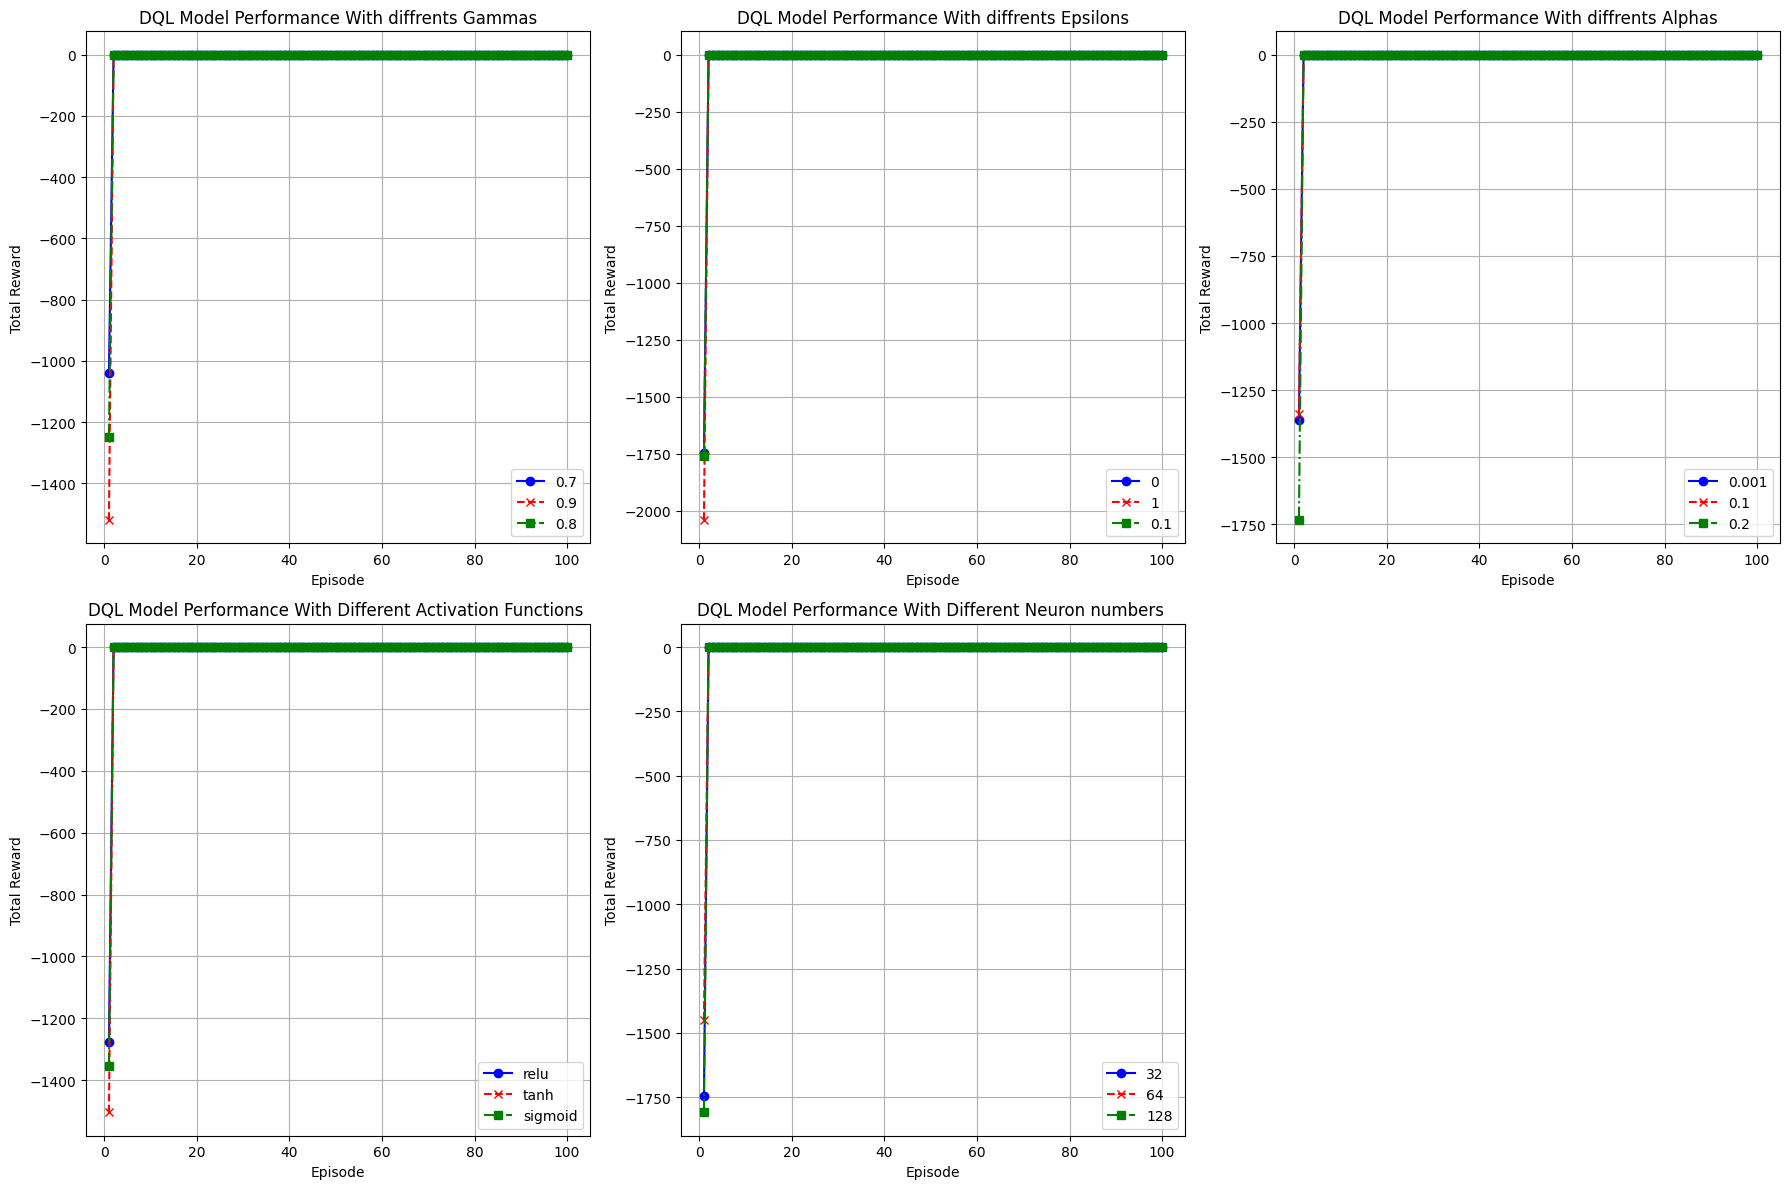

In [9]:
# --- Visualization ---
plt.figure(figsize=(18, 12))  # Adjust the figure size


# Plot 1: Diffrent Gammas
plt.subplot(2, 3, 1)
plt.plot(range(1, NUM_EPISODES + 1), results_gammmas[0][1], label=f"{results_gammmas[0][0]}", color="blue", linestyle='-', marker="o")
plt.plot(range(1, NUM_EPISODES + 1), results_gammmas[1][1], label=f"{results_gammmas[1][0]}", color="red", linestyle='--', marker='x')
plt.plot(range(1, NUM_EPISODES + 1), results_gammmas[2][1], label=f"{results_gammmas[2][0]}", color="green", linestyle='-.', marker='s')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("DQL Model Performance With diffrents Gammas")
plt.legend()
plt.grid(True)

# Plot 2: Diffrent Epsilons
plt.subplot(2, 3, 2)  # (rows, cols, position)
plt.plot(range(1, NUM_EPISODES + 1), results_epsilon[0][1], label=f"{results_epsilon[0][0]}", color="blue", linestyle='-', marker="o")
plt.plot(range(1, NUM_EPISODES + 1), results_epsilon[1][1], label=f"{results_epsilon[1][0]}", color="red", linestyle='--', marker='x')
plt.plot(range(1, NUM_EPISODES + 1), results_epsilon[2][1], label=f"{results_epsilon[2][0]}", color="green", linestyle='-.', marker='s')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("DQL Model Performance With diffrents Epsilons")
plt.legend()
plt.grid(True)

# Plot 3: Diffrent Alphas
plt.subplot(2, 3, 3)
plt.plot(range(1, NUM_EPISODES + 1), results_alphas[0][1], label=f"{results_alphas[0][0]}", color="blue", linestyle='-', marker="o")
plt.plot(range(1, NUM_EPISODES + 1), results_alphas[1][1], label=f"{results_alphas[1][0]}", color="red", linestyle='--', marker='x')
plt.plot(range(1, NUM_EPISODES + 1), results_alphas[2][1], label=f"{results_alphas[2][0]}", color="green", linestyle='-.', marker='s')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("DQL Model Performance With diffrents Alphas")
plt.legend()
plt.grid(True)

# Plot 4: Diffrent Activation Functions
plt.subplot(2, 3, 4)  # (rows, cols, position)
plt.plot(range(1, NUM_EPISODES + 1), results_activations[0][1], label=f"{results_activations[0][0]}", color="blue", linestyle='-', marker="o")
plt.plot(range(1, NUM_EPISODES + 1), results_activations[1][1], label=f"{results_activations[1][0]}", color="red", linestyle='--', marker='x')
plt.plot(range(1, NUM_EPISODES + 1), results_activations[2][1], label=f"{results_activations[2][0]}", color="green", linestyle='-.', marker='s')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("DQL Model Performance With Different Activation Functions ")
plt.legend()
plt.grid(True)


# Plot 5: Diffrent Nb_neurons
plt.subplot(2, 3, 5)  # (rows, cols, position)
plt.plot(range(1, NUM_EPISODES + 1), results_neurons[0][1], label=f"{results_neurons[0][0]}", color="blue", linestyle='-', marker="o")
plt.plot(range(1, NUM_EPISODES + 1), results_neurons[1][1], label=f"{results_neurons[1][0]}", color="red", linestyle='--', marker='x')
plt.plot(range(1, NUM_EPISODES + 1), results_neurons[2][1], label=f"{results_neurons[2][0]}", color="green", linestyle='-.', marker='s')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("DQL Model Performance With Different Neuron numbers ")
plt.legend()
plt.grid(True)

# Show all plots
plt.tight_layout()  # Adjust spacing between plots
plt.show()

**- Best parameter selection : Gamma of 0.7, Epsilon of 0.1, Alpha of 0.1, activation function of relu and nb of neurons of 64**

In [ ]:
result, model = train(EPSILON=0.1, GAMMA=0.7, ALPHA=0.1, NB_NEURONS=64, ACTIVATION="relu")
model.save("DQL_network_model.keras")

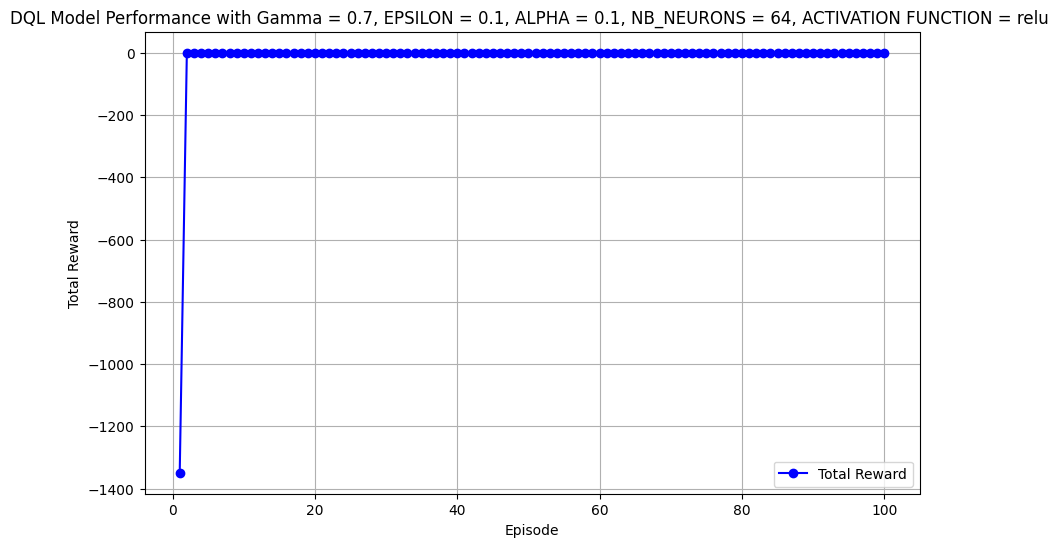

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, NUM_EPISODES + 1), result, label="Total Reward", color="blue", marker="o")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("DQL Model Performance with Gamma = 0.7, EPSILON = 0.1, ALPHA = 0.1, NB_NEURONS = 64, ACTIVATION FUNCTION = relu ")
plt.legend()
plt.grid(True)
plt.show()